In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

import cv2

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.ndimage import imread

from skimage import data, io, filters

from os import listdir, makedirs
from os.path import isfile, join, exists

# Training Data

In [138]:
train_mat = loadmat('data/train_32x32.mat')['X']
train_labels = loadmat('data/train_32x32.mat')['y']
shape_train = train_mat.shape

# Testing Data

In [139]:
test_mat = loadmat('data/test_32x32.mat')['X']
test_labels = loadmat('data/test_32x32.mat')['y']
shape_test = test_mat.shape

In [140]:
train_data = train_mat
test_data = test_mat

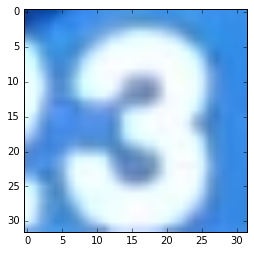

In [141]:
import matplotlib.image as mpimg

imgplot = plt.imshow(train_data[:,:,:,3])
imgplot.set_cmap('spectral')

In [ ]:
"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

train_data, train_labels = reformat(train_data, train_labels)
test_data, test_labels = reformat(test_data, test_labels)

# Load images

In [8]:
test_orig_path = 'data/test'
test_gray_path = 'data/test_gray'
train_orig_path = 'data/train'
train_gray_path = 'data/train_gray'

# return list of image names from path specified
def get_imgs(dir_path):
    return [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if f.endswith('.png')]

# Convert images to grayscale

In [9]:
def make_grayscale(orig_path, gray_path):
    # grap list of original images (.png only)
    orig_imgs = get_imgs(orig_path)
    
    # if output directory doesn't exist, make it
    if not exists(gray_path):
        makedirs(gray_path)
    
    # convert images to grayscale and save to output directory
    for o_img in orig_imgs:
        img_name = str(o_img)
        o_img = cv2.imread('{0}/{1}'.format(orig_path, o_img))
        g_img = cv2.cvtColor(o_img, cv2.COLOR_RGB2GRAY)
        
        out_fname = '{0}/{1}'.format(gray_path, img_name)
        cv2.imwrite(out_fname, g_img)

In [106]:
train_mat = 'data/train_32x32.mat'
train_32 = loadmat(train_mat)

In [107]:
a = sio.loadmat('data/train_32x32.mat', squeeze_me=True, struct_as_record=False)

In [136]:
a['X']

(32, 3, 73257)

In [123]:
73257/3


24419.0

In [128]:
24419**(1/2)

156.26579920123277

In [85]:
SVHN_train_RGB = sio.loadmat('data/train_32x32.mat', squeeze_me=True, struct_as_record=False)
SVHN_test_RGB = sio.loadmat('data/test_32x32.mat', squeeze_me=True, struct_as_record=False)

In [86]:
SVHN_train = (numpy.sum(SVHN_train_RGB['X'],2)/3)
SVHN_test = (numpy.sum(SVHN_test_RGB['X'],2)/3)

In [94]:
(dim1,dim2,nImages)=SVHN_train.shape
SVHN_train_V = numpy.zeros((nImages,dim1*dim2))
for i in range(0,nImages):
    SVHN_train_V[i,:]=SVHN_train[:,:,i].flatten()

In [96]:
SVHN_train_V.shape

(73257, 1024)

In [100]:
cv2.imwrite('testcv2.png', SVHN_train_V)

True

In [29]:
#!/usr/bin/python
#code to display a picture in a window using cv2
import cv2

cv2.namedWindow('picture',cv2.WINDOW_AUTOSIZE)
frame=cv2.imread(train_32['X'][0])
cv2.imshow('picture',frame)
if cv2.waitKey(0) == 27:
        cv2.destroyAllWindows()

TypeError: bad argument type for built-in operation

In [12]:
_ = '''
make_grayscale(test_orig_path, test_gray_path)
make_grayscale(train_orig_path, train_gray_path)
'''

# Video

In [5]:
_ = '''
cap = cv2.VideoCapture(0) # number is the numbered sequence for your video input (if you have multiple)
                          # you can also replace the 0 with a file name and load a file

# output to file
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480)) 

while True:
    ret, frame = cap.read()
    
    # covert to grayscale
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # write to file
    #out.write(frame)
    
    cv2.imshow('frame', frame) #normal
    cv2.imshow('gray', grey) #grayscale
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.DestroyAllWindows()
'''

# Rectangle

In [6]:
            #img obj, start, stop,      color,       line-width  
#cv2.rectangle(img, (15,25), (150,150), (255,255,255), 5)